In [1]:
import pandas as pd
import numpy as np
import regex as re

In [2]:
dataset = pd.read_csv('data/data_clean_removed.csv')
dataset.drop(["Unnamed: 0"],inplace= True,axis = 1)

In [3]:
dataset = dataset.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [4]:
dataset.head(5)

,Price,Space,Rooms,Market,Year,elevator,Parkingplace,balkon,taras,ogrdek,district,street,level,max_level
0,4000000.0,560.00,4,wtórny,2015,1,1,1,1,1,Wawer,Patriotów,3,3
1,4000000.0,560.00,4,wtórny,2015,1,1,1,1,1,Wawer,Patriotów,3,3
2,21350100.0,487.75,10,wtórny,2021,1,1,0,0,0,Śródmieście,Elektryczna,6,6
3,19900000.0,487.00,6,wtórny,2001,1,1,0,0,0,Mokotów,Cybulskiego,5,5
4,795900.0,445.00,2,pierwotny,2022,1,1,0,0,0,Praga-Południe,Gocław,4,8


In [5]:
dataset_dummies = pd.get_dummies(dataset,columns=['Market','street','district'])

## Finding most suitable model

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [7]:
algorithms = [['gradient_boost_reg',GradientBoostingRegressor()],['ElasticNet',ElasticNet()],['SGDREG',SGDRegressor()],["SVR",SVR()],["BsyRidge",BayesianRidge()],["KerRidge",KernelRidge()],["LR",LinearRegression()],
                ["XGBReg",XGBRegressor()],["CatBoostReg",CatBoostRegressor()]]

In [8]:
score = []
name_list = [] 

def train_predict_save_metrics(algorithms_list,dataset):
    x = dataset.iloc[:,1:]
    y =  dataset.iloc[:,-1]
    kfold = KFold(n_splits=10,shuffle=True, random_state=42)
    for name, alg in algorithms_list:
        cv_results = cross_val_score(alg, x, y, cv=kfold, scoring='neg_root_mean_squared_error')
        score.append(cv_results)
        name_list.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [9]:
train_predict_save_metrics(algorithms,dataset_dummies)

gradient_boost_reg: -0.006052 (0.013033)


C:\Users\Krzysztof\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet: -0.004275 (0.012263)
SGDREG: -1028938223142115.750000 (671695838006258.250000)
SVR: -0.094072 (0.017669)
BsyRidge: -0.006371 (0.013127)
KerRidge: -0.005830 (0.012441)
LR: -0.006374 (0.013130)
XGBReg: -0.008208 (0.016416)
Learning rate set to 0.053345
0:	learn: 0.0135044	total: 165ms	remaining: 2m 45s
1:	learn: 0.0133243	total: 174ms	remaining: 1m 26s
2:	learn: 0.0131465	total: 182ms	remaining: 1m
3:	learn: 0.0129711	total: 191ms	remaining: 47.5s
4:	learn: 0.0127980	total: 199ms	remaining: 39.6s
5:	learn: 0.0126273	total: 207ms	remaining: 34.2s
6:	learn: 0.0124588	total: 215ms	remaining: 30.4s
7:	learn: 0.0122926	total: 222ms	remaining: 27.6s
8:	learn: 0.0121286	total: 230ms	remaining: 25.4s
9:	learn: 0.0119668	total: 238ms	remaining: 23.6s
10:	learn: 0.0118072	total: 246ms	remaining: 22.1s
11:	learn: 0.0116497	total: 254ms	remaining: 20.9s
12:	learn: 0.0114943	total: 261ms	remaining: 19.8s
13:	learn: 0.0113723	total: 269ms	remaining: 18.9s
14:	learn: 0.0112207	total: 277ms	

C:\Users\Krzysztof\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Krzysztof\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Krzysztof\AppData\Roaming\Python\Python39\site-packages\catboost\core.py", line 5590, in fit
    return self._fit(X, y, cat_features, None, None, None, sample_weight, None, None, None, None, baseline,
  File "C:\Users\Krzysztof\AppData\Roaming\Python\

In [36]:
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

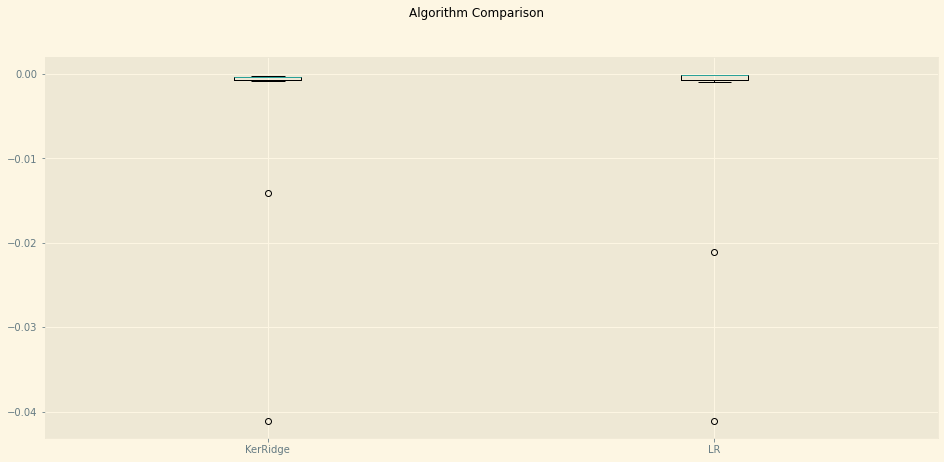

In [37]:
fig = plt.figure(figsize = [16,7])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(score)
ax.set_xticklabels(name_list)
plt.show()

In [12]:
dict = {}
for x,y in zip(name_list,score):
    dict[x] = y.mean()

In [25]:
dict_sorted = {k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}

In [26]:
dict_sorted

{'SGDREG': -1028938223142115.8,
 'SVR': -0.09407228309910645,
 'XGBReg': -0.00820817333527657,
 'LR': -0.006373948143736448,
 'BsyRidge': -0.00637076810676587,
 'gradient_boost_reg': -0.006051644848134033,
 'KerRidge': -0.005830291097905729,
 'ElasticNet': -0.004275141875846852,
 'CatBoostReg': nan}

In [27]:
dict_sorted.pop('SGDREG')
dict_sorted.pop('CatBoostReg')
dict_sorted.pop('SVR')

-0.09407228309910645

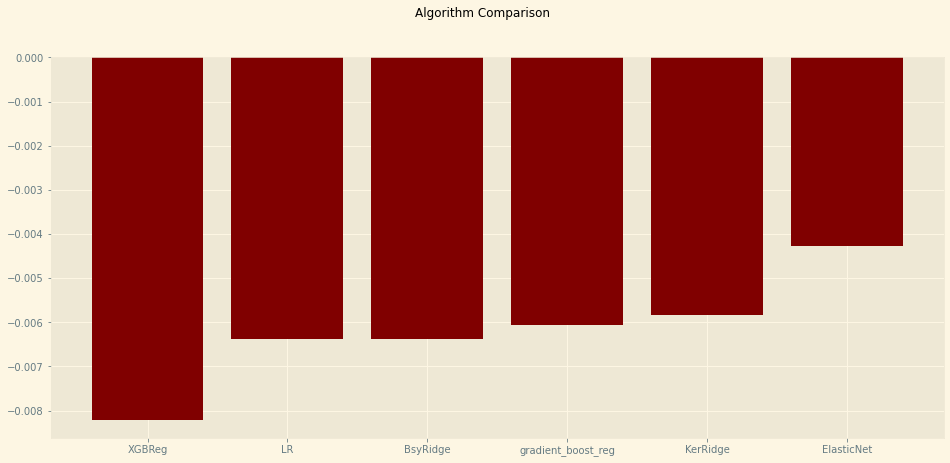

In [39]:
fig = plt.figure(figsize = [16,7])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(range(len(dict_sorted)),list(dict_sorted.values()),tick_label = list(dict_sorted.keys()),color ='maroon')
plt.show()

## Tuning model 

In [47]:
from sklearn.linear_model import ElasticNetCV

In [48]:
models = [
    ['ElasticNet',ElasticNetCV(),{
    'clf__alphas': np.arange(0.1, 2, 0.5),
    'clf__l1_ratio': np.arange(0.1,1,0.3),
    }],
    ['gradient_boost_reg',GradientBoostingRegressor(),{
    'clf__learning_rate': np.arange(0.05, 1, 0.05),
    'clf__max_depth': np.arange(3,10,1),
    'clf__n_estimators': np.arange(50,250,50)
    }],
    ["KerRidge",KernelRidge(),{'clf__alpha': np.arange(0.1,2,0.5)}]
    ]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dataset_dummies.drop('Price',axis=1),dataset_dummies['Price'] , test_size=0.2, random_state=1234)

In [50]:
def tune(name,model,X_train,y_train,param_grid):
    pipe = Pipeline([("Standard_scaler",StandardScaler()), ('clf',model)])
    rand_auc = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=5, scoring='roc_auc', cv=5, verbose=False)
    rand_auc.fit(X_train, y_train)
    rand_auc.best_score_

In [51]:
tuned_models = []
for name, alg,dic in models:
    tuned_models.append(tune(name,alg,X_train,y_train,dic))

### TO DO
-   mean bar plot
- feature importance
- hyperparametr optimiznation
